Analysis of AB interaction with memory

In [89]:
#set up the environment
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from os import walk,getcwd
import matplotlib.pyplot as plt
#custom helper functions for reading in data files and performing key analysis steps
%run AB_mem_helper_funcs.py
curwd = getcwd()
mypath = "data"
pd.options.mode.chained_assignment = None  # default='warn'

In [90]:
#find the data file paths
dataFiles = list(walk(mypath))[0][2]
dataFiles = Series([curwd + '\\' + mypath +'\\'+ file for file in dataFiles])


In [91]:
dataFiles

0     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
1     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
2     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
3     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
4     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
5     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
6     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
7     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
8     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
9     C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
10    C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
11    C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
12    C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
13    C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
14    C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
15    C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
16    C:\Users\User\OneDrive\Documents\GitHub\ABmem\...
17    C:\Users\User\OneDrive\Documents\GitHub\AB

In [92]:
#find all the relevant summary stats for each data file
allDat = dataFiles.map(readDataFile)

C:\Users\User\OneDrive\Documents\GitHub\ABmem\AB_mem_helper_funcs.py:61: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  out = pd.Series()
C:\Users\User\OneDrive\Documents\GitHub\ABmem\AB_mem_helper_funcs.py:61: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  out = pd.Series()
C:\Users\User\OneDrive\Documents\GitHub\ABmem\AB_mem_helper_funcs.py:61: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  out = pd.Series()
C:\Users\User\OneDrive\Documents\GitHub\ABmem\AB_mem_helper_funcs.py:61: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ou

In [93]:
DataFrame(allDat[4])


,2022-06-29_10h58.31.945
Lag5_T1P_T2A_T1,0.750000
Lag5_T1P_T2A_T2,0.928571
Lag5_T1P_T2A_T2_T1,0.904762
Lag1_T1P_T2P_T1,0.919540
Lag1_T1P_T2P_T2,0.908046
Lag1_T1P_T2P_T2_T1,0.912500
Lag5_T1P_T2P_T1,0.930233
Lag5_T1P_T2P_T2,0.860465
Lag5_T1P_T2P_T2_T1,0.850000
Lag5_T1A_T2A_T1,1.000000


In [94]:
#aggregate the summaries into a dataframe
df = DataFrame()
for row in allDat: 
    df = df.add(DataFrame(row), fill_value = 0)
df = df.T

In [95]:
df

,Lag1_T1A_T2A_T1,Lag1_T1A_T2A_T2,Lag1_T1A_T2A_T2_T1,Lag1_T1A_T2P_T1,Lag1_T1A_T2P_T2,Lag1_T1A_T2P_T2_T1,Lag1_T1P_T2A_T1,Lag1_T1P_T2A_T2,Lag1_T1P_T2A_T2_T1,Lag1_T1P_T2P_T1,...,PP1blink_mem,PP1cor_mem,PP1miss_mem,PP5cor_mem,T1Overall,T2Overall,distMem,distracter_mem,novel_mem,targMem
2022-06-28_15h27.56.947,1.0,1.0,1.000000,1.000000,0.678571,0.678571,0.857143,0.892857,0.875000,0.816092,...,0.625000,0.622222,0.000000,0.593750,0.598131,0.520833,0.780591,0.403846,0.886486,0.754153
2022-06-28_16h39.33.399,1.0,1.0,1.000000,0.964286,0.678571,0.703704,0.857143,0.928571,0.916667,0.965517,...,0.688889,0.513514,NaN,0.648649,0.611111,0.542169,0.852321,0.634615,0.913514,0.794118
2022-06-29_09h00.40.945,0.8,0.6,0.500000,0.714286,0.892857,0.850000,0.750000,0.357143,0.285714,0.896552,...,0.800000,0.671429,0.500000,0.465116,0.611570,0.592000,0.827004,0.903846,0.805405,0.717949
2022-06-29_10h01.10.225,0.9,1.0,1.000000,1.000000,0.500000,0.500000,0.821429,0.928571,0.913043,0.908046,...,0.777778,0.720000,0.000000,0.714286,0.739496,0.701149,0.810127,0.461538,0.908108,0.835017
2022-06-29_10h58.31.945,1.0,0.9,0.900000,0.964286,0.928571,0.925926,0.892857,0.821429,0.800000,0.919540,...,0.428571,0.338028,0.000000,0.444444,0.382114,0.355932,0.852321,0.480769,0.956757,0.724590
2022-06-29_12h25.08.771,0.9,1.0,1.000000,0.892857,0.750000,0.760000,0.750000,0.892857,0.904762,0.839080,...,0.724138,0.761905,0.333333,0.871795,0.778761,0.747475,0.738397,0.788462,0.724324,0.737013
2022-06-29_13h55.44.897,0.9,0.4,0.444444,0.964286,0.857143,0.851852,0.785714,0.571429,0.636364,0.908046,...,0.640000,0.596154,0.000000,0.593750,0.617391,0.549020,0.763713,0.365385,0.875676,0.764120
2022-06-29_16h26.54.527,0.9,0.8,0.777778,0.928571,0.571429,0.576923,0.678571,0.857143,0.842105,0.850575,...,0.756098,0.562500,0.000000,0.545455,0.611111,0.534247,0.835443,0.596154,0.902703,0.797251
2022-06-30_09h08.37.319,0.0,0.1,NaN,0.035714,0.214286,0.000000,0.142857,0.035714,0.000000,0.068966,...,0.000000,0.000000,0.491228,0.000000,0.000000,0.529412,0.873418,0.576923,0.956757,0.797794
2022-06-30_10h36.41.165,1.0,1.0,1.000000,1.000000,0.821429,0.821429,0.892857,0.964286,0.960000,0.931034,...,0.840000,0.592593,NaN,0.692308,0.685484,0.603960,0.789030,0.576923,0.848649,0.772727


In [122]:
df['blinkMag'] = df['Lag5_T1P_T2P_T2_T1'] - df['Lag1_T1P_T2P_T2_T1']
df.to_csv(r'test.csv')

Data cleaning

dfGP:

(array([2., 1., 0., 3., 3., 7., 1., 0., 1., 1.]),
 array([-0.0625    ,  0.00486111,  0.07222222,  0.13958333,  0.20694444,
         0.27430556,  0.34166667,  0.40902778,  0.47638889,  0.54375   ,
         0.61111111]),
 <BarContainer object of 10 artists>)

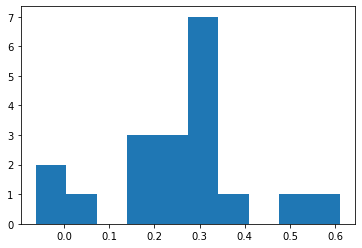

In [97]:
#how big is the attentional blink we observe? 
plt.hist(df['blinkMag'])

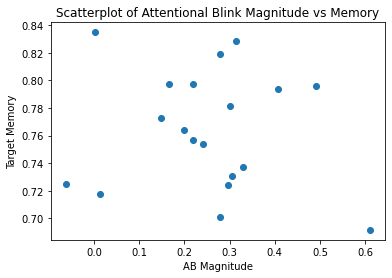

In [98]:
#does a bigger attentional blink (worse performance) lead to better memory on a subject level? 
plt.scatter(df['blinkMag'], df['targMem'])
plt.xlabel('AB Magnitude')
plt.ylabel('Target Memory')
plt.title('Scatterplot of Attentional Blink Magnitude vs Memory')
plt.show()

(array([2., 2., 2., 2., 3., 3., 0., 2., 1., 2.]),
 array([-0.05757576, -0.02577652,  0.00602273,  0.03782197,  0.06962121,
         0.10142045,  0.1332197 ,  0.16501894,  0.19681818,  0.22861742,
         0.26041667]),
 <BarContainer object of 10 artists>)

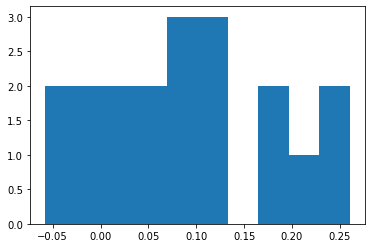

In [99]:
#does spending more time (and causing an attentional blink) on T1 lead to better memory on an item level? 
plt.hist(df['PP1blink_mem'] - df['PP1cor_mem'])

(array([1., 0., 1., 0., 0., 3., 7., 5., 1., 1.]),
 array([0.        , 0.08717949, 0.17435897, 0.26153846, 0.34871795,
        0.43589744, 0.52307692, 0.61025641, 0.6974359 , 0.78461538,
        0.87179487]),
 <BarContainer object of 10 artists>)

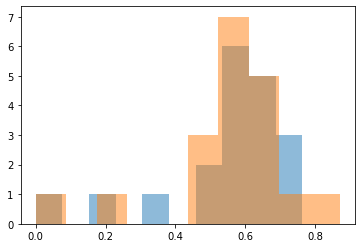

In [100]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
#data

plt.hist(df['PP1cor_mem'], alpha=0.5)



plt.hist(df['PP5cor_mem'], alpha=0.5)


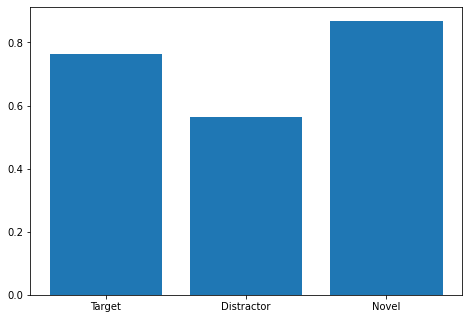

In [101]:
ColumnMeans = df.apply(np.mean)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
section = ['Target', 'Distractor', 'Novel']
Memory = ['targMem', 'distracter_mem', 'novel_mem']
ax.bar(section,ColumnMeans[Memory])
plt.show()

In [102]:
ColumnMeans = df.apply(np.mean)

In [103]:
ColumnMeans[Memory]

targMem           0.764404
distracter_mem    0.563765
novel_mem         0.869701
dtype: float64

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.05972517, 0.15972517, 0.25972517, 0.35972517, 0.45972517,
        0.55972517, 0.65972517, 0.75972517, 0.85972517, 0.95972517,
        1.05972517]),
 <BarContainer object of 10 artists>)

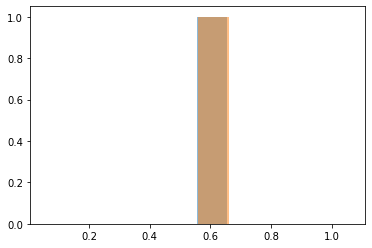

In [104]:
ColumnMeans = df.apply(np.mean)
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
#data

plt.hist(ColumnMeans['PP1cor_mem'], alpha=0.5)



plt.hist(ColumnMeans['PP5cor_mem'], alpha=0.5)




(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.25867928, 0.35867928, 0.45867928, 0.55867928, 0.65867928,
        0.75867928, 0.85867928, 0.95867928, 1.05867928, 1.15867928,
        1.25867928]),
 <BarContainer object of 10 artists>)

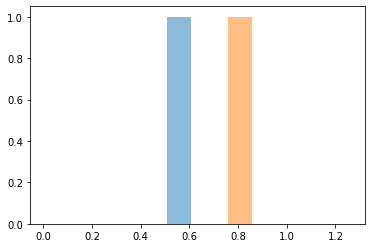

In [105]:
ColumnMeans = df.apply(np.mean)
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
#data

plt.hist(ColumnMeans['Lag1_T1P_T2P_T2_T1'], alpha=0.5)



plt.hist(ColumnMeans['Lag5_T1P_T2P_T2_T1'], alpha=0.5)




(array([1., 0., 1., 0., 1., 0., 2., 4., 5., 5.]),
 array([0.    , 0.0875, 0.175 , 0.2625, 0.35  , 0.4375, 0.525 , 0.6125,
        0.7   , 0.7875, 0.875 ]),
 <BarContainer object of 10 artists>)

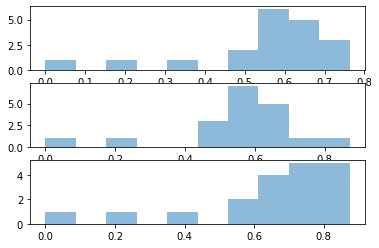

In [119]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
plt.hist(df['PP1cor_mem'], alpha=0.5)
ax2 = fig.add_subplot(3,1,2)
plt.hist(df['PP5cor_mem'], alpha=0.5)
ax3 = fig.add_subplot(3,1,3)
plt.hist(df['PP1blink_mem'], alpha=0.5)


In [121]:
df.loc[df['PP1blink_mem']<0.5,:]

,Lag1_T1A_T2A_T1,Lag1_T1A_T2A_T2,Lag1_T1A_T2A_T2_T1,Lag1_T1A_T2P_T1,Lag1_T1A_T2P_T2,Lag1_T1A_T2P_T2_T1,Lag1_T1P_T2A_T1,Lag1_T1P_T2A_T2,Lag1_T1P_T2A_T2_T1,Lag1_T1P_T2P_T1,...,PP1cor_mem,PP1miss_mem,PP5cor_mem,T1Overall,T2Overall,distMem,distracter_mem,novel_mem,targMem,blinkMag
2022-06-29_10h58.31.945,1.0,0.9,0.9,0.964286,0.928571,0.925926,0.892857,0.821429,0.800000,0.919540,...,0.338028,0.000000,0.444444,0.382114,0.355932,0.852321,0.480769,0.956757,0.724590,-0.062500
2022-06-30_09h08.37.319,0.0,0.1,NaN,0.035714,0.214286,0.000000,0.142857,0.035714,0.000000,0.068966,...,0.000000,0.491228,0.000000,0.000000,0.529412,0.873418,0.576923,0.956757,0.797794,0.166667
2022-07-01_17h04.12.064,1.0,0.6,0.6,1.000000,0.642857,0.642857,0.821429,0.857143,0.869565,0.850575,...,0.222222,0.200000,0.200000,0.227273,0.173913,0.801688,0.134615,0.989189,0.700680,0.277992


(array([1., 0., 1., 0., 0., 3., 7., 5., 1., 1.]),
 array([0.        , 0.08717949, 0.17435897, 0.26153846, 0.34871795,
        0.43589744, 0.52307692, 0.61025641, 0.6974359 , 0.78461538,
        0.87179487]),
 <BarContainer object of 10 artists>)

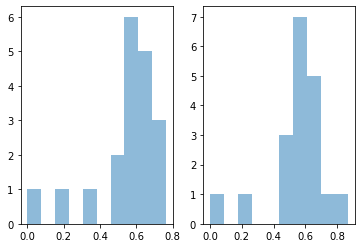

In [107]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
plt.hist(df['PP1cor_mem'], alpha=0.5)
ax2 = fig.add_subplot(1,2,2)
plt.hist(df['PP5cor_mem'], alpha=0.5)


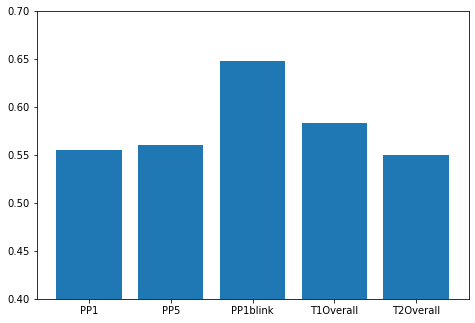

In [114]:
ColumnMeans = df.apply(np.mean)
ColumnSD = df.apply(np.std)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
section = ['PP1', 'PP5', 'PP1blink', 'T1Overall', 'T2Overall']
CorMem = ['PP1cor_mem', 'PP5cor_mem', 'PP1blink_mem', 'T1Overall', 'T2Overall']
ax.bar(section,ColumnMeans[CorMem])
plt.ylim([0.4,0.7])
plt.show()

In [115]:
ColumnSD

Lag1_T1A_T2A_T1       0.222178
Lag1_T1A_T2A_T2       0.245627
Lag1_T1A_T2A_T2_T1    0.181742
Lag1_T1A_T2P_T1       0.213029
Lag1_T1A_T2P_T2       0.170442
Lag1_T1A_T2P_T2_T1    0.204107
Lag1_T1P_T2A_T1       0.163134
Lag1_T1P_T2A_T2       0.241466
Lag1_T1P_T2A_T2_T1    0.253307
Lag1_T1P_T2P_T1       0.188532
Lag1_T1P_T2P_T2       0.185347
Lag1_T1P_T2P_T2_T1    0.204560
Lag5_T1A_T2A_T1       0.233959
Lag5_T1A_T2A_T2       0.303625
Lag5_T1A_T2A_T2_T1    0.251385
Lag5_T1A_T2P_T1       0.212876
Lag5_T1A_T2P_T2       0.138551
Lag5_T1A_T2P_T2_T1    0.190432
Lag5_T1P_T2A_T1       0.157334
Lag5_T1P_T2A_T2       0.233477
Lag5_T1P_T2A_T2_T1    0.245892
Lag5_T1P_T2P_T1       0.182805
Lag5_T1P_T2P_T2       0.178434
Lag5_T1P_T2P_T2_T1    0.149431
PP1T2_mem             0.239341
PP1blink_mem          0.213686
PP1cor_mem            0.181370
PP1miss_mem           0.247937
PP5cor_mem            0.186022
T1Overall             0.184777
T2Overall             0.119630
distMem               0.050865
distract

In [116]:
.2/np.sqrt(20)

0.044721359549995794

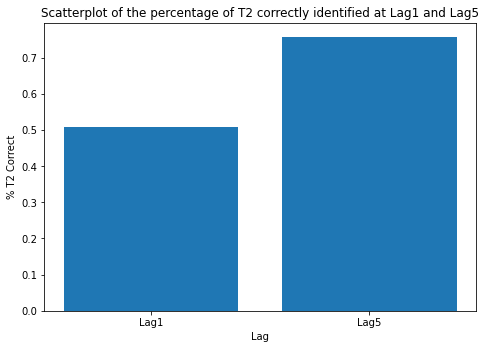

In [117]:
ColumnMeans = df.apply(np.mean)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
section = ['Lag1', 'Lag5']
CorMem = ['Lag1_T1P_T2P_T2_T1', 'Lag5_T1P_T2P_T2_T1']
ax.bar(section,ColumnMeans[CorMem])
plt.xlabel('Lag')
plt.ylabel('% T2 Correct')
plt.title('Scatterplot of the percentage of T2 correctly identified at Lag1 and Lag5')
plt.show()


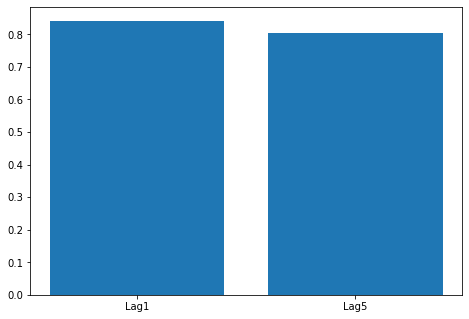

In [120]:
ColumnMeans = df.apply(np.mean)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
section = ['Lag1', 'Lag5']
CorMem = ['Lag1_T1P_T2P_T1', 'Lag5_T1P_T2P_T1']
ax.bar(section,ColumnMeans[CorMem])

plt.show()


KeyError: 'key of type tuple not found and not a MultiIndex'

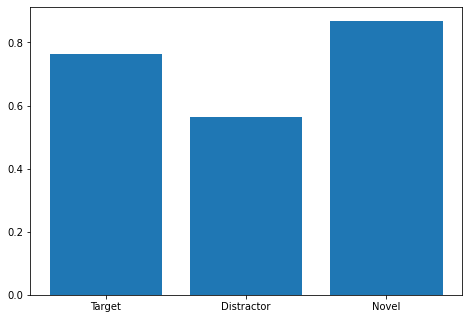

In [137]:
#calculate means
ColumnMeans = df.apply(np.mean)
#calculate the standard deviation
ColumnSD = df.apply(np.std)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#data
section = ['Target', 'Distractor', 'Novel']
Memory = ['targMem', 'distracter_mem', 'novel_mem']
ax.bar(section,ColumnMeans[Memory])
error = [ColumnSD['targMem', 'distracter_mem', 'novel_mem']]
plt.show()

In [138]:
ColumnSD = df.apply(np.std)

In [134]:
ColumnSD

Lag1_T1A_T2A_T1       0.222178
Lag1_T1A_T2A_T2       0.245627
Lag1_T1A_T2A_T2_T1    0.181742
Lag1_T1A_T2P_T1       0.213029
Lag1_T1A_T2P_T2       0.170442
Lag1_T1A_T2P_T2_T1    0.204107
Lag1_T1P_T2A_T1       0.163134
Lag1_T1P_T2A_T2       0.241466
Lag1_T1P_T2A_T2_T1    0.253307
Lag1_T1P_T2P_T1       0.188532
Lag1_T1P_T2P_T2       0.185347
Lag1_T1P_T2P_T2_T1    0.204560
Lag5_T1A_T2A_T1       0.233959
Lag5_T1A_T2A_T2       0.303625
Lag5_T1A_T2A_T2_T1    0.251385
Lag5_T1A_T2P_T1       0.212876
Lag5_T1A_T2P_T2       0.138551
Lag5_T1A_T2P_T2_T1    0.190432
Lag5_T1P_T2A_T1       0.157334
Lag5_T1P_T2A_T2       0.233477
Lag5_T1P_T2A_T2_T1    0.245892
Lag5_T1P_T2P_T1       0.182805
Lag5_T1P_T2P_T2       0.178434
Lag5_T1P_T2P_T2_T1    0.149431
PP1T2_mem             0.239341
PP1blink_mem          0.213686
PP1cor_mem            0.181370
PP1miss_mem           0.247937
PP5cor_mem            0.186022
T1Overall             0.184777
T2Overall             0.119630
distMem               0.050865
distract

TypeError: unsupported operand type(s) for *: 'float' and 'function'

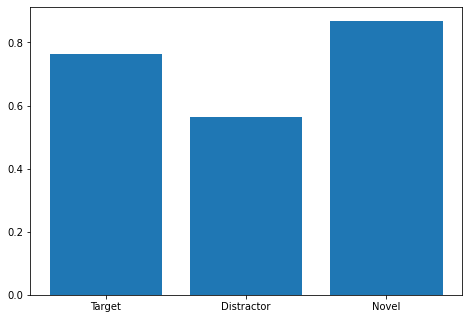

In [141]:
#calculate means
ColumnMeans = df.apply(np.mean)
#calculate the standard deviation
ColumnSD = df.apply(np.std)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#data
section = ['Target', 'Distractor', 'Novel']
Memory = ['targMem', 'distracter_mem', 'novel_mem']
ax.bar(section,ColumnMeans[Memory])
ci = 0.1 * np.std / np.mean
plt.show()